# Predicting Airline Passenger Satisfaction 

### Objectives

* To determine what amenities/features of an airline influce passenger satisfaction the most
* To create a model that can be used by airlines to determine whether based on their amentites, passengers will be satisfied or not

In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline

### Data Ingestion, Summary and Investigation

In [381]:
df= pd.read_csv('train.csv')

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

* There are null values in the Arrival Delay in Minutes column

In [383]:
def produce_missing_report(df):
    percent_missing= df.isnull().sum()*100 / len(df)
    missing_values_df= pd.DataFrame(
        {
        'column_name' : df.columns,
        'percent_missing' : percent_missing
        }
    )
    return missing_values_df

In [384]:
produce_missing_report(df)

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
id,id,0.000000
Gender,Gender,0.000000
Customer Type,Customer Type,0.000000
Age,Age,0.000000
Type of Travel,Type of Travel,0.000000
Class,Class,0.000000
Flight Distance,Flight Distance,0.000000
Inflight wifi service,Inflight wifi service,0.000000
Departure/Arrival time convenient,Departure/Arrival time convenient,0.000000


In [385]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


* Columns Inflight wifi service to Cleanliness have values ranging 1 to 5.
* Satisfaction may be 1 of 2 values: satisfied or neutral/dissatisfied
* The Unnamed and id columns are not meaningful and can be removed.

In [386]:
df.isna().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

In [387]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [388]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [389]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [390]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [391]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [392]:
df[df['Flight Distance']<=0].shape

(0, 25)

In [393]:
df['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [394]:
df[df['Arrival Delay in Minutes']<0].shape

(0, 25)

In [395]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [396]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(0.0)

In [397]:
df[df['Departure Delay in Minutes']<0].shape

(0, 25)

In [398]:
df['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [399]:
df.value_counts("id")!=1  #check whether there are repeated IDs which could indicate duplicate data

id
1         False
86507     False
86519     False
86518     False
86517     False
          ...  
43254     False
43253     False
43252     False
43250     False
129880    False
Length: 103904, dtype: bool

In [400]:
df1= df.value_counts("id")!=1
df1.any()

False

Therefore there are no duplicates

In [401]:
df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].max()

Inflight wifi service                5
Departure/Arrival time convenient    5
Ease of Online booking               5
Gate location                        5
Food and drink                       5
Online boarding                      5
Seat comfort                         5
Inflight entertainment               5
On-board service                     5
Leg room service                     5
Baggage handling                     5
Checkin service                      5
Inflight service                     5
Cleanliness                          5
dtype: int64

In [402]:
df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].min()

Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     1
Checkin service                      0
Inflight service                     0
Cleanliness                          0
dtype: int64

In [403]:
df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].isin([1,2,3,4,5]).sum()

Inflight wifi service                100801
Departure/Arrival time convenient     98604
Ease of Online booking                99417
Gate location                        103903
Food and drink                       103797
Online boarding                      101476
Seat comfort                         103903
Inflight entertainment               103890
On-board service                     103901
Leg room service                     103432
Baggage handling                     103904
Checkin service                      103903
Inflight service                     103901
Cleanliness                          103892
dtype: int64

* The assumption is made that these 14 columns contain a rating from 1 to 5.
* Therefore a rating of 0 indicates missing data.


### Data Cleaning and Imputation

In [404]:
df= df.drop(['Unnamed: 0', 'id'], axis=1)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [405]:
df['Customer Type']=df['Customer Type'].replace({'Loyal Customer':0, 'disloyal Customer':1})

In [406]:
df['Type of Travel']= df['Type of Travel'].replace({'Personal Travel':0, 'Business travel':1})

In [407]:
df['Gender']= df['Gender'].replace({'Male':0, 'Female':1})

In [408]:
df['Class']=df['Class'].replace({'Eco': 0, 'Eco Plus':1, 'Business':2})

In [409]:
df['satisfaction']=df['satisfaction'].replace({'satisfied':1,'neutral or dissatisfied':0 })

In [410]:
df.astype({'Type of Travel': 'float64', 'Customer Type': 'float64', 'Class':'float64', 'Gender':'float64', 'satisfaction':'float64', 'Age':'float64', 'Flight Distance': 'float64', 'Inflight wifi service':'float64', 'Departure/Arrival time convenient':'float64', 'Ease of Online booking':'float64', 'Gate location':'float64', 'Food and drink':'float64', 'Online boarding':'float64', 'Seat comfort':'float64','Inflight entertainment':'float64', 'On-board service':'float64', 'Leg room service':'float64', 'Baggage handling':'float64', 'Checkin service':'float64', 'Inflight service':'float64', 'Cleanliness':'float64', 'Departure Delay in Minutes':'float64', 'satisfaction':'float64'}).dtypes

Gender                               float64
Customer Type                        float64
Age                                  float64
Type of Travel                       float64
Class                                float64
Flight Distance                      float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
satisfacti

### Feature Selection

In [411]:
df.corrwith(df['satisfaction']).sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503557
Class                                0.494471
Type of Travel                       0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
Gate location                        0.000682
Gender                              -0.012211
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes          

* The following columns will be dropped because they are out of the airline's control: Age, Gender, Class, Type of Travel, Flight Distance, Customer Type, Departure Delay in Minutes and Arrival Delay in Minutes

* Gate location and Departure/Arrival time convenient do not have a high correlation to passenger satisfaction. Their correlation is close to 0 which indicates that there is no relationship between these features and passenger satisfcation, so these columns will be dropped


In [412]:
df2= pd.DataFrame()
df2=df[['Online boarding','Inflight entertainment', 'Seat comfort','On-board service','Leg room service', 'Cleanliness','Inflight wifi service','Baggage handling','Inflight service','Checkin service','Food and drink','Ease of Online booking']]

In [413]:
df2.head(5)

,Online boarding,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Inflight wifi service,Baggage handling,Inflight service,Checkin service,Food and drink,Ease of Online booking
0,3,5,5,4,3,5,3,4,5,4,5,3
1,3,1,1,1,5,1,3,3,4,1,1,3
2,5,5,5,4,3,5,2,4,4,4,5,2
3,2,2,2,2,5,2,2,3,4,1,2,5
4,5,3,5,3,4,3,3,4,3,3,4,3


In [414]:
df2.corrwith(df['satisfaction']).sort_values(ascending=False)

Online boarding           0.503557
Inflight entertainment    0.398059
Seat comfort              0.349459
On-board service          0.322383
Leg room service          0.313131
Cleanliness               0.305198
Inflight wifi service     0.284245
Baggage handling          0.247749
Inflight service          0.244741
Checkin service           0.236174
Food and drink            0.209936
Ease of Online booking    0.171705
dtype: float64

### Data Visualization 

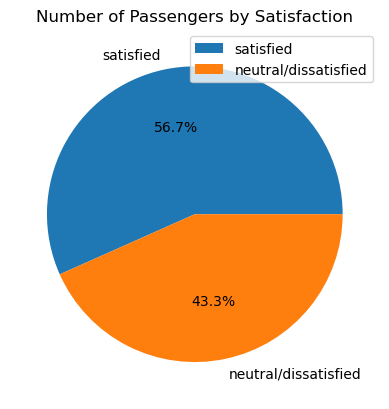

In [415]:
labels='satisfied','neutral/dissatisfied'
m=df['satisfaction'].value_counts()
fig, ax = plt.subplots()
ax.pie(m, labels=labels, autopct='%1.1f%%')

ax.set_title("Number of Passengers by Satisfaction")
ax.legend(loc="upper right")

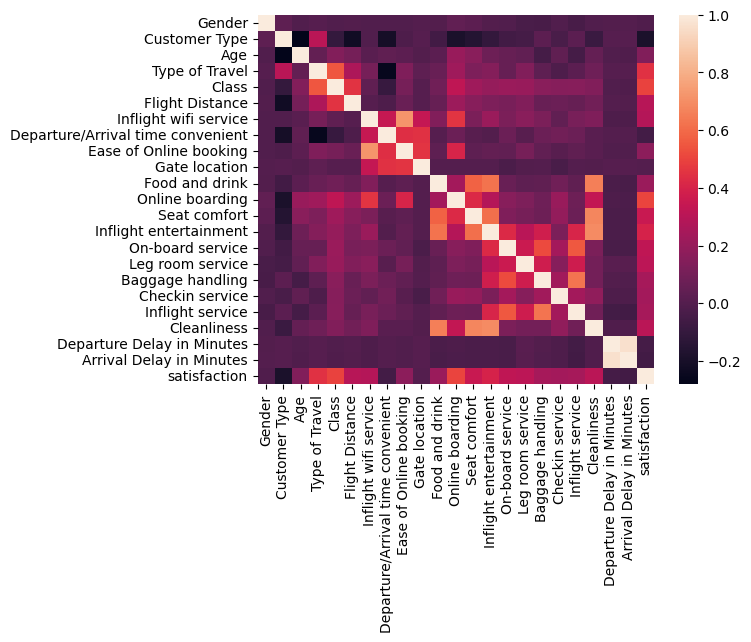

In [416]:
ax = sns.heatmap(df.corr(), annot=False)

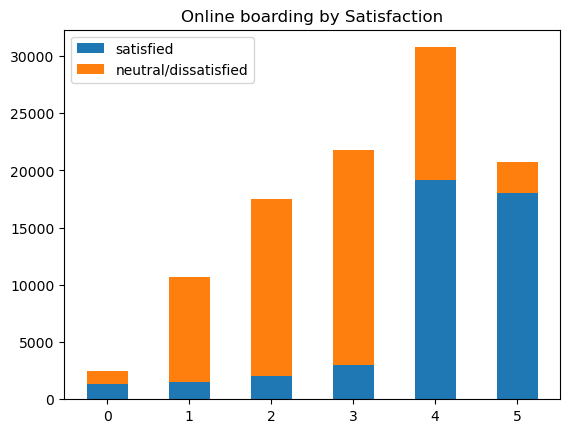

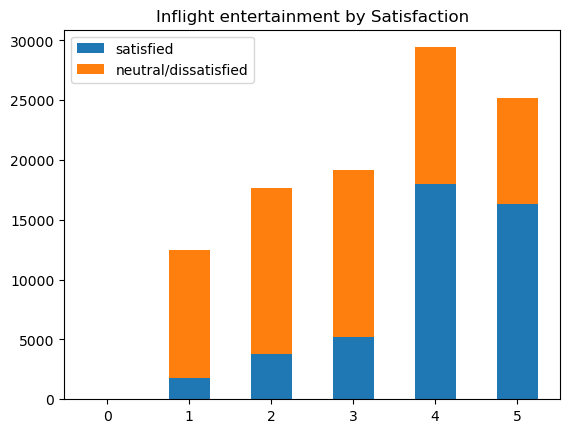

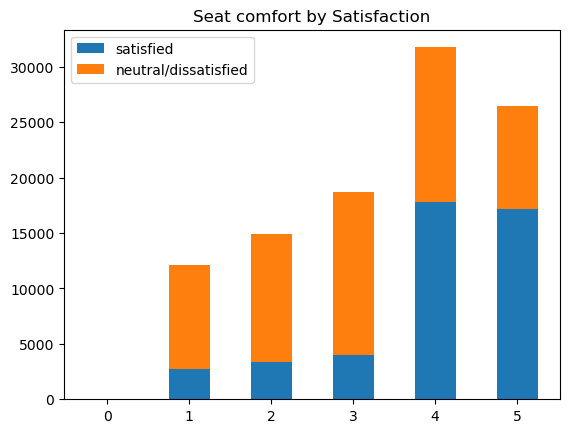

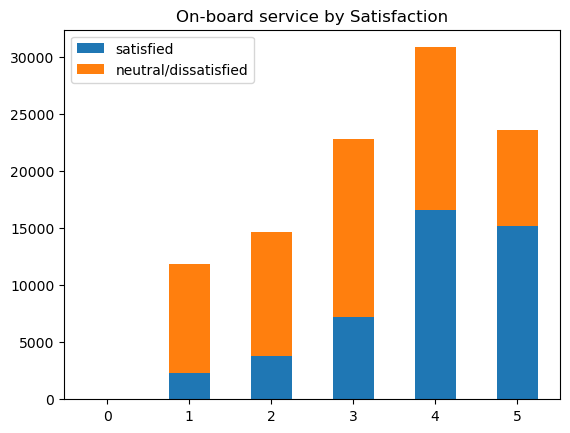

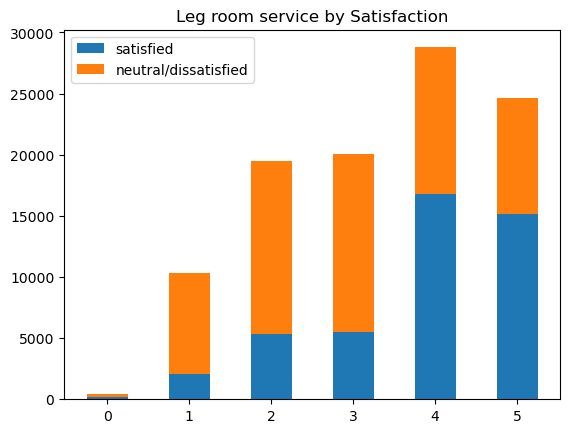

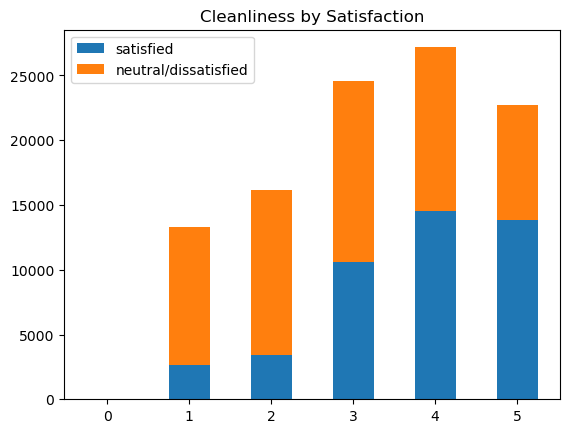

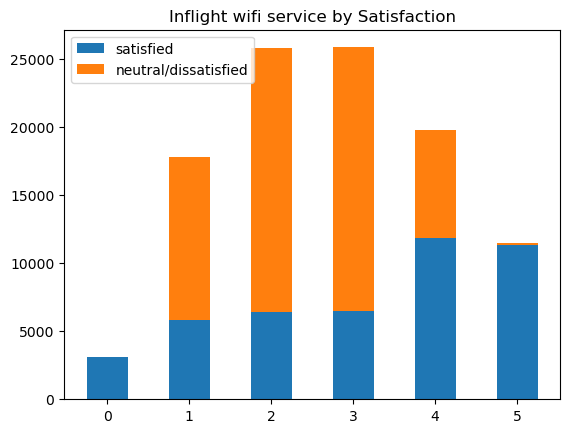

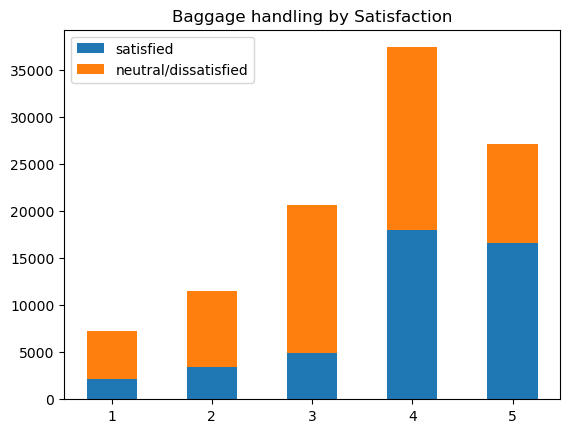

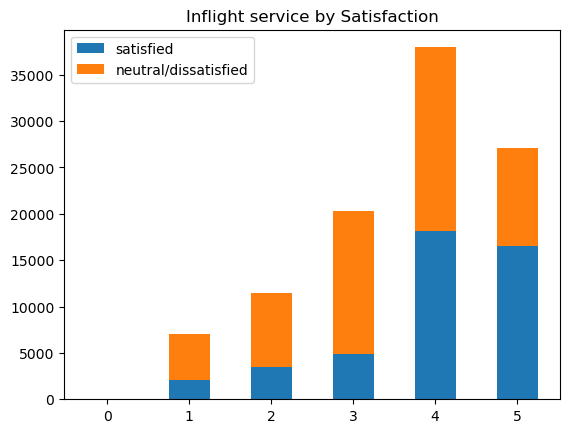

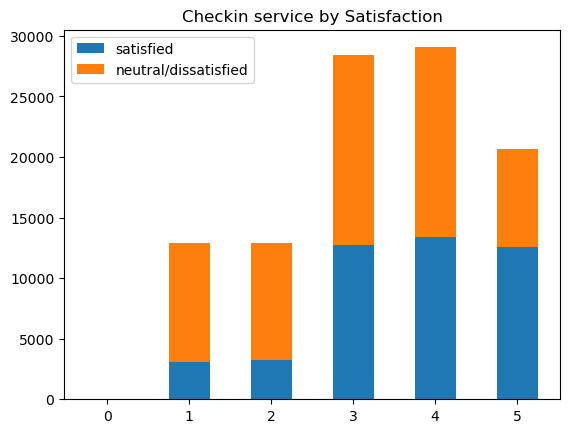

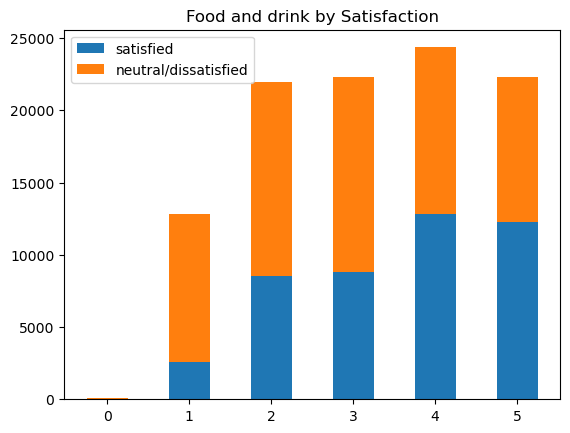

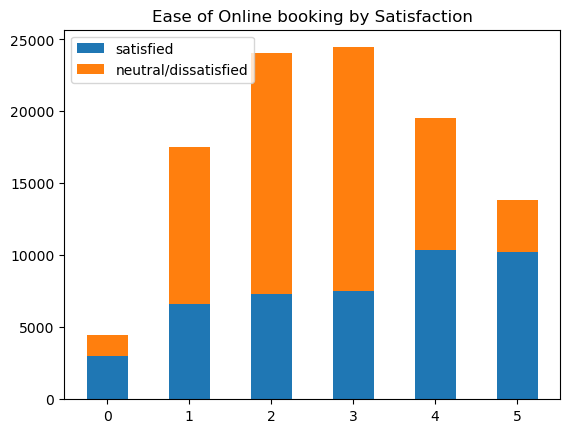

In [417]:
for a in range(12):
    rating =df2.iloc[:, a].sort_values(ascending=True).unique()
    
    pos=[]
    for r in rating:
        p= df2[(df2.iloc[:, a]==r) & (df['satisfaction']==1)].__len__()
        pos.append(p)
    
    neg=[]
    for r in rating:
        p= df2[(df2.iloc[:, a]==r) & (df['satisfaction']==0)].__len__()
        neg.append(p)

    satisfaction_leg={
    'satisfied':pos,
    'neutral/dissatisfied': neg,
    }

    width = 0.5

    fig, ax = plt.subplots()
    bottom = np.zeros(rating.__len__())

    for boolean, s in satisfaction_leg.items():
        p = ax.bar(rating, s, width, label=boolean, bottom=bottom)
        bottom += s

    ax.set_title("%s by Satisfaction" % df2.iloc[:, a].name)
    ax.legend(loc="upper left")
        

### Modelling

In [418]:
X= df2
y= df['satisfaction']

In [419]:
scaler_ = StandardScaler()
X = scaler_.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [420]:
models= [LogisticRegression(), GaussianNB(), RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

In [421]:
def models_fit(x_train, x_test, y_train, y_test, models):
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Model : %s" % type(model).__name__)
        print("Accuracy: %s" % accuracy)
        print ("")

In [422]:
accuracies= models_fit(x_train, x_test, y_train, y_test, models)

Model : LogisticRegression
Accuracy: 0.8104037341802608

Model : GaussianNB
Accuracy: 0.7859823877580482

Model : RandomForestClassifier
Accuracy: 0.9299600596698908

Model : KNeighborsClassifier
Accuracy: 0.904961262691882

Model : SVC
Accuracy: 0.91504258697849



### Conclusion

Features/ Amenities that have the greatest influence on passenger satisfaction are:
*  Online boarding           
* Inflight entertainment    
* Seat comfort              
* On-board service          
* Leg room service

Features/ Amenities that have the least influence on passenger satisfaction are:
* Food and Drink
* Ease of Online booking 
* Gate location

The Random Forest Classifier was used to predict passenger satisfaction with an accuracy of 93.0%